In [1]:
import numpy as np  #linear Algebra
import pandas as pd #data processing, csv file I/O (e.g. pd.read_cvs)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Breastcancer.csv')
data.head()

,id,condition,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

if 'id' in data.columns:
  data = data.drop('id', axis = 1)

  data['condition'] = data['condition'].map({'M' : 1, 'B': 0 })

datas = pd.DataFrame(preprocessing.scale(data.iloc[:, 1:32]))
datas.columns = list(data.iloc[:, 1:32].columns)
datas['condition'] = data['condition']

data_drop = datas.drop('condition', axis = 1)
X = data_drop.values

tsne = TSNE(verbose = 1, perplexity = 40, n_iter = 4000)

Y = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.178791
[t-SNE] KL divergence after 2000 iterations: 0.868435


TSNE - t distributed Stochastic Neighbor Embedding
package for dimensionalily
reduction
cols that use do not need many not be include in data analysis
excluding col - reducing the dimension of the data

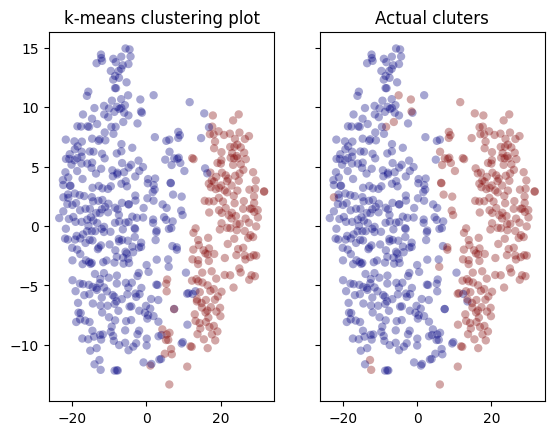

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmns = KMeans(n_clusters=2, init ='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x= True, algorithm = 'lloyd')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(Y[:, 0], Y[:, 1], c = kY, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:, 0], Y[:, 1], c = datas['condition'], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title('Actual cluters')
plt.show()

Text(0.5, 1.0, 'Actual cluters')

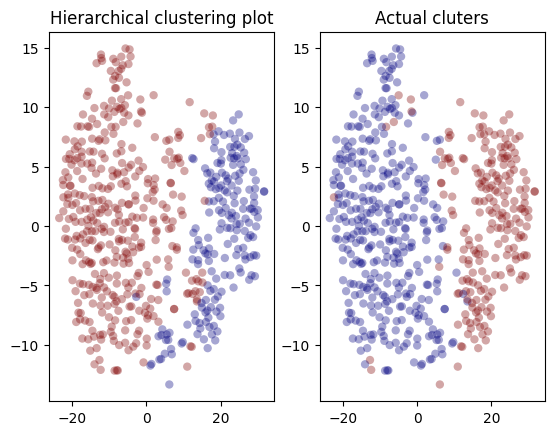

In [11]:
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters= 2, linkage='ward')
kY = aggC.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharex = True)

ax1.scatter(Y[:, 0], Y[:, 1], c = kY, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(Y[:, 0], Y[:, 1], c = datas['condition'], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title('Actual cluters')